In [26]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [27]:
df = pd.read_csv("air_india_reviews.csv")
df.head()

,published_date,rating,type,helpful_votes,title,text
0,2024-03-28T17:44:04-04:00,1,review,0,BAD SERVICE AND BAD HOSPITALITY,From their side my baggage is broken but still...
1,2024-03-28T17:24:01-04:00,1,review,0,AI 188 and AI 187 flight nightmare !,I took AI 188 noon -9th March 2024 - it was de...
2,2024-03-28T16:31:49-04:00,1,review,0,worst airline to travel dont waste ur money,one of worst flight to fly with book one way l...
3,2024-03-27T22:43:53-04:00,3,review,0,"Good, Can be Better!",The positive aspects on my flight were: punctu...
4,2024-03-27T08:12:41-04:00,1,review,0,Poor airlines and services,"Extremally poor services in flight, aircraft i..."


In [28]:
print("shape of the data :",df.shape)

shape of the data : (4840, 6)


In [29]:
print("Combined two text to one single column for better understanding of review : ")
df['reviews'] = df['title'] + ' ' + df['text']

Combined two text to one single column for better understanding of review : 


In [30]:
df.columns

Index(['published_date', 'rating', 'type', 'helpful_votes', 'title', 'text',
       'reviews'],
      dtype='object')

In [31]:
print("Dropping columns : ['published_date', 'type', 'helpful_votes', 'title', 'text']")
df.drop(columns=['published_date', 'type', 'helpful_votes', 'title', 'text'], inplace=True)

Dropping columns : ['published_date', 'type', 'helpful_votes', 'title', 'text']


In [32]:
df.head()

,rating,reviews
0,1,BAD SERVICE AND BAD HOSPITALITY From their sid...
1,1,AI 188 and AI 187 flight nightmare ! I took AI...
2,1,worst airline to travel dont waste ur money on...
3,3,"Good, Can be Better! The positive aspects on m..."
4,1,Poor airlines and services Extremally poor ser...


In [33]:
print("No of unique values in rating column :",df['rating'].nunique())

No of unique values in rating column : 5


In [34]:
print("No of unique value_count in rating column :",df['rating'].value_counts())

No of unique value_count in rating column : rating
1    2049
4     922
5     739
3     615
2     515
Name: count, dtype: int64


In [35]:
# Create a new column `sentiment_label` based on the values in the `polarity` column
def sentiment_label(rating):
  if rating < 3:
    return 0
  elif rating == 3:
    return 1
  else:
    return 1

df['sentiment_label'] = df['rating'].apply(sentiment_label)

In [36]:
df.drop(columns=['rating'], inplace=True)

In [37]:
df['reviews']

0       BAD SERVICE AND BAD HOSPITALITY From their sid...
1       AI 188 and AI 187 flight nightmare ! I took AI...
2       worst airline to travel dont waste ur money on...
3       Good, Can be Better! The positive aspects on m...
4       Poor airlines and services Extremally poor ser...
                              ...                        
4835    Very good flight!!! One of the better options ...
4836    nice aircraft- dreamliner AI operates dreamlin...
4837    Worst airline worst crew I travelled recently ...
4838    Nice and Comfortable The destination was so cl...
4839    Returning home as a medical tourist I was trav...
Name: reviews, Length: 4840, dtype: object

In [38]:
#performing text pre-processing on reviews column
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

nltk.download('stopwords')
nltk.download('wordnet')

def preprocess_text(text):
    # Lowercasing
    text = text.str.lower()  

    # Remove special characters, punctuation, and numbers
    text = text.astype(str).str.replace(r'[^\w\s]', '', regex=True)  
    text = text.astype(str).str.replace(r'\d+', '', regex=True)  

    # Tokenization (split into words)
    text = text.apply(nltk.word_tokenize) 

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = text.apply(lambda x: [word for word in x if word not in stop_words]) 

    # Lemmatization (reduce words to base form)
    lemmatizer = WordNetLemmatizer()
    text = text.apply(lambda x: [lemmatizer.lemmatize(word) for word in x]) 

    # Join the words back into a string
    text = text.apply(lambda x: ' '.join(x))

    return text

# Apply the preprocessing function to your reviews column
df['preprocessed_reviews'] = preprocess_text(df['reviews'])
df.drop(columns=['reviews'], inplace=True)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [39]:
import re
common_words = ["india", "flight", "airline", "airport", "plane", "aircraft"]

def remove_common_words(text):
  words = re.sub(r'[^\w\s]','',text).lower().split()
  filtered_words = [word for word in words if word not in common_words]
  return ' '.join(filtered_words)

df['preprocessed_reviews'] = df['preprocessed_reviews'].astype(str).apply(remove_common_words)

In [40]:
print("After pre-processing the data : ")
df['preprocessed_reviews']

After pre-processing the data : 


0       bad service bad hospitality side baggage broke...
1       ai ai nightmare took ai noon th march delayed ...
2       worst travel dont waste ur money one worst fly...
3       good better positive aspect punctuality polite...
4       poor service extremally poor service old broke...
                              ...                        
4835    good one better option fly economy class fly d...
4836    nice dreamliner ai operates dreamliner delhi d...
4837    worst worst crew travelled recently air horrib...
4838    nice comfortable destination close therefore d...
4839    returning home medical tourist travelling back...
Name: preprocessed_reviews, Length: 4840, dtype: object

In [41]:
# Calculate the number of positive and negative reviews
num_negative = df['sentiment_label'].value_counts()[0]
num_positive  = df['sentiment_label'].value_counts()[1]

# Calculate the length of each review
df['review_length'] = df['preprocessed_reviews'].astype(str).apply(len)

# Calculate the mean review length for positive and negative reviews
mean_length_negative = df[df['sentiment_label'] == 0]['review_length'].mean()
mean_length_positive = df[df['sentiment_label'] == 1]['review_length'].mean()

# Print the results
print(f'Number of positive reviews: {num_positive}')
print(f'Number of negative reviews: {num_negative}')

print(f'Mean length of positive reviews: {mean_length_positive:.2f}')
print(f'Mean length of negative reviews: {mean_length_negative:.2f}')


Number of positive reviews: 2276
Number of negative reviews: 2564
Mean length of positive reviews: 270.17
Mean length of negative reviews: 433.40


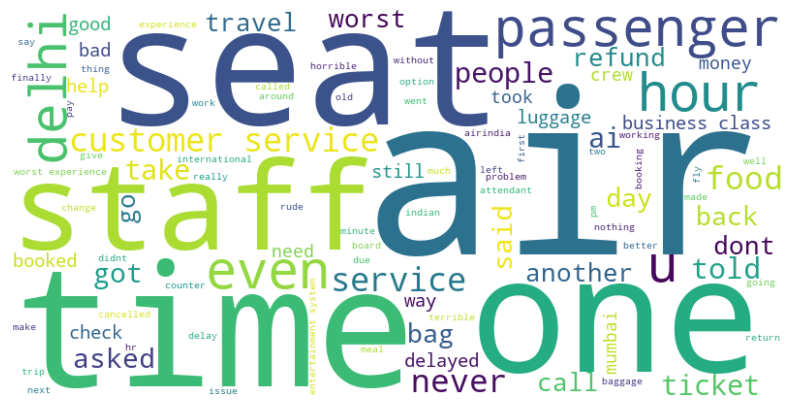

In [42]:
#finding negative review
negative_review = df[df['sentiment_label']==0]

# 1. Combine all preprocessed text into a single string
all_text = " ".join(negative_review['preprocessed_reviews'])

# 2. Generate word cloud
wordcloud = WordCloud(background_color='white', width=800, height=400, max_words=100).generate(all_text)

# 3. Display the generated image
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

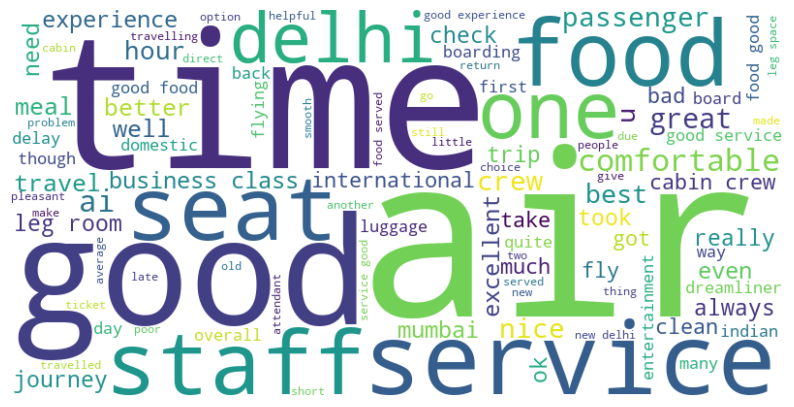

In [43]:
#finding negative review
positive_review = df[df['sentiment_label']==1]

# 1. Combine all preprocessed text into a single string
all_text2 = " ".join(positive_review['preprocessed_reviews'])

# 2. Generate word cloud
wordcloud = WordCloud(background_color='white', width=800, height=400, max_words=100).generate(all_text2)

# 3. Display the generated image
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [44]:
#Performing Word Frequency Analysis
words = []
for i in df['preprocessed_reviews']:
    words.extend(i.split())

from collections import Counter
word_freq = Counter(words)
word_freq_df = pd.DataFrame(list(word_freq.items()), columns=['Word', 'Frequency'])
word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False)
print(word_freq_df.head(20))


           Word  Frequency
32          air       5825
1       service       3312
11         time       2955
105        seat       2568
118        good       2435
103        food       2357
18        staff       2189
373        hour       2163
212  experience       1968
517       delhi       1816
62          one       1693
77        worst       1421
192    customer       1388
614           u       1325
148        even       1283
240       would       1261
140   passenger       1166
179       never       1124
7           get       1117
419        crew       1090


In [45]:
df.drop(columns=['review_length'],inplace=True)

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [47]:
X = df['preprocessed_reviews']
y = df['sentiment_label']  # Assuming you have labels like 'positive' or 'negative'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize text using TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [53]:
classifiers = [MultinomialNB(),LogisticRegression(max_iter=1000),LinearSVC(),RandomForestClassifier(),KNeighborsClassifier()]

Train_accuracy = []
Test_accuracy = []
matrix = []

# Iterate through classifiers
for model in classifiers:
    clf = model.fit(X_train_tfidf, y_train)
    y_pred = clf.predict(X_test_tfidf)
    
    # Convert probabilities to binary labels (if needed)
    if hasattr(clf, 'predict_proba'):  # If model has predict_proba, use threshold
        y_pred_proba = clf.predict_proba(X_test_tfidf)[:, 1]
        y_pred = (y_pred_proba > 0.5).astype(int)
    
    # Ensure y_train is binary 
    y_train = y_train.astype(int)

    Train_accuracy.append(accuracy_score(y_train, clf.predict(X_train_tfidf)))
    Test_accuracy.append(accuracy_score(y_test, y_pred))


In [55]:
ML_model_df=pd.DataFrame({"Model":['MultinomialNB()','LogisticRegression(max_iter=1000)','LinearSVC()','RandomForestClassifier()','KNeighborsClassifier()'],
                         "Train_accuracy":Train_accuracy,
                         "Test_accuracy":Test_accuracy
                         })

ML_model_df = ML_model_df.sort_values(by='Test_accuracy',ascending=False)
print(ML_model_df)

                               Model  Train_accuracy  Test_accuracy
1  LogisticRegression(max_iter=1000)        0.949897       0.911157
3           RandomForestClassifier()        1.000000       0.905992
2                        LinearSVC()        0.995868       0.903926
0                    MultinomialNB()        0.935950       0.893595
4             KNeighborsClassifier()        0.903151       0.846074


In [60]:
LR = LogisticRegression(max_iter=1000)
LR.fit(X_train_tfidf, y_train)
y_pred = LR.predict(X_test_tfidf)
print(accuracy_score(y_test, y_pred))

0.9111570247933884


In [61]:
import pickle

# Save the model
with open('logistic_regression_model.pkl', 'wb') as file:
    pickle.dump(LR, file)

In [62]:
with open('tfidf_vectorizer.pkl', 'wb') as file:
    pickle.dump(vectorizer, file)